# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [6]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [139]:
# Show me the mouse metadata as well so I can get an idea of how it looks
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
merge_check = mouse_metadata.loc[mouse_metadata["Mouse ID"] == "b128"]
merge_check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
31,b128,Capomulin,Female,9,22


In [9]:
# Combine the data into a single DataFrame
results_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")


# Display the data table for preview
results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [21]:
# Checking the number of mice.
total_mice = results_df["Mouse ID"].unique()
len(total_mice)

249

In [140]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Use group by to count the sets of timepoints per Mouse ID - any mouse ID with > 1 set of timepoint observations would be a duplicate
duplicate_check = results_df.groupby(["Mouse ID", "Timepoint"]).size()

# Find there the size() of the groupby is >1 and display the Mouse ID from that spot
find_the_mouse = duplicate_check[duplicate_check >1].reset_index()["Mouse ID"]
find_the_mouse

0    g989
1    g989
2    g989
3    g989
4    g989
Name: Mouse ID, dtype: object

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
offending_mouse = results_df[results_df["Mouse ID"]=="g989"].reset_index()[results_df.columns]
offending_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I created a new DataFrame that excludes any rows where the Mouse ID matches the ID of the offending mouse
results_df1 = results_df[results_df["Mouse ID"] != "g989"]

In [39]:
# Quick check on my new, cleaned DataFrame
results_df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [36]:
# Checking the number of mice in the clean DataFrame (should be 248)
len(results_df1["Mouse ID"].unique())

248

## Summary Statistics

In [141]:
# Before I create a summary statistics table, I'm going to list the columns of the clean DataFrame
# so I can copy and paste for the columns I want to use
results_df1.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# First I'm checking my groupby syntax to summarize with the current columns in place
summary_stats = results_df1.groupby(["Drug Regimen"]).count()
summary_stats

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [54]:
# Now, setting up a bunch of variables to hold the summary stats and checking them as I go

# Avg tumor volume is the sum of tumors by drug regimen divided by the count of tumors for each drug regimen
tumor_mean_vol = results_df1.groupby(["Drug Regimen"]).sum()["Tumor Volume (mm3)"] / \
results_df1.groupby(["Drug Regimen"]).count() ["Tumor Volume (mm3)"]
tumor_mean_vol

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [55]:
# Median tumor volume is just a groupby with the median method

tumor_med_vol = results_df1.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"] 
tumor_med_vol

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [56]:
# Grabbing variance volume
tumor_var_vol = results_df1.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"] 
tumor_var_vol

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [58]:
# Grabbing std dev
tumor_std_vol = results_df1.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"] 
tumor_std_vol

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [59]:
# Grabbing SEM
tumor_sem_vol = results_df1.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"] 
tumor_sem_vol

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [61]:
# using a dictionary of lists to create a summary dataframe by referencing the variables just created for each of the columns

summary_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean_vol, 'Median Tumor Volume' : tumor_med_vol, 
                           'Tumor Volume Variance': tumor_var_vol, 'Tumor Volume Std. Dev': tumor_std_vol, 
                           'Tumor Volume Std. Err': tumor_sem_vol})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# I do this using np and st functions and the "agg()" method
stats_summary_df = results_df1.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
stats_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

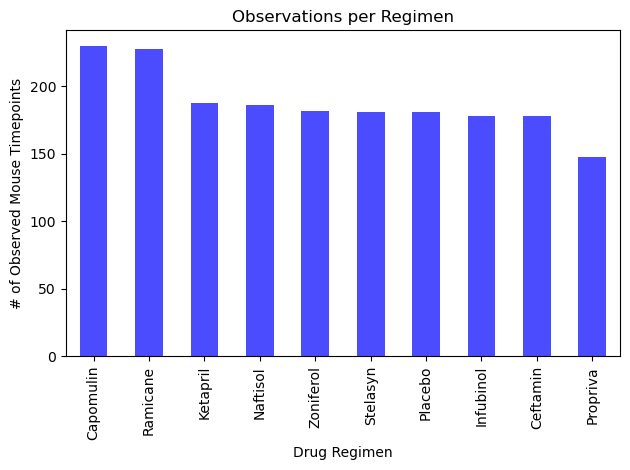

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Initiatlize a variable that holds the data to plot
drug_regimen_counts = results_df1["Drug Regimen"].value_counts()

# Plotting the bar plot using .plot (Pandas)
drug_regimen_counts.plot(kind='bar', color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Observations per Regimen')

# Rotating x-axis labels to vertical
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set up the parameters for the bar chart
# Assuming your DataFrame is named results_df1 and "Drug Regimen" is the column of interest
drug_regimen_counts = results_df1["Drug Regimen"].value_counts()

# Extracting data for plotting
# Create the x-axis by converting the index (drug regimen names) into a list
drug_regimens = drug_regimen_counts.index.tolist()

# Create the y-axis by converting the values of that .value_counts() into a list
counts = drug_regimen_counts.values.tolist()

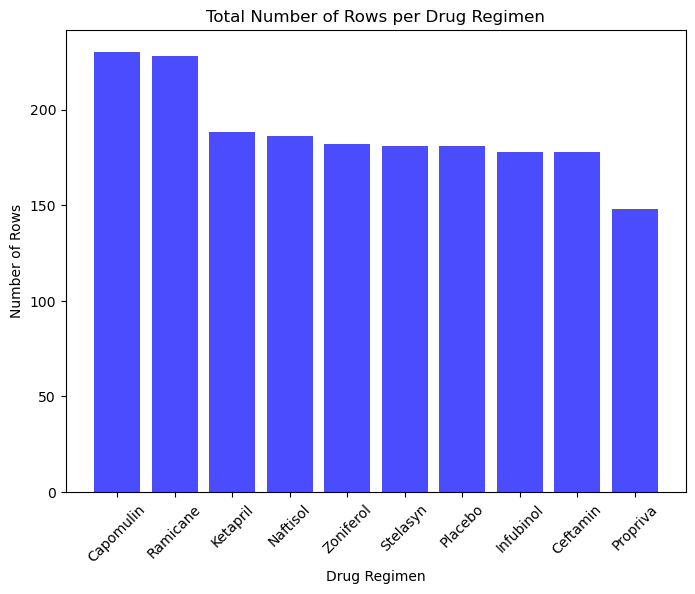

In [143]:
# Constrain the figure size
plt.figure(figsize=(8, 6))  

# Plot using pyplot (plt.<...>)
plt.bar(drug_regimens, counts, color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Drug Regimen')

# Rotate x labels
plt.xticks(rotation=45)
plt.show()

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# As a first step, get value counts of each gender
results_df1['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

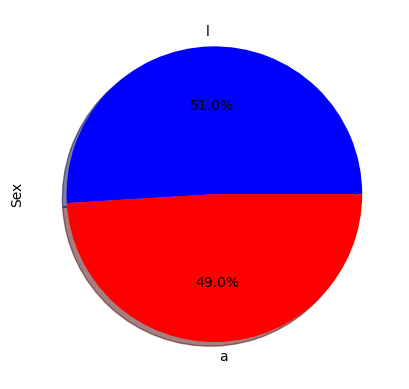

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get 'Male' vs 'Female' value counts and assign them to a variable
gender_split = results_df1['Sex'].value_counts()

# Set up the labels for the pie slices
labels = ['Male', 'Female']

# Plot using the .plot method (Pandas)
gender_split.plot(kind='pie', labels='labels', colors = ['blue', 'red'], autopct='%1.1f%%', shadow=True)
plt.show()

Text(0.5, 1.0, 'Distribution of Male vs Female')

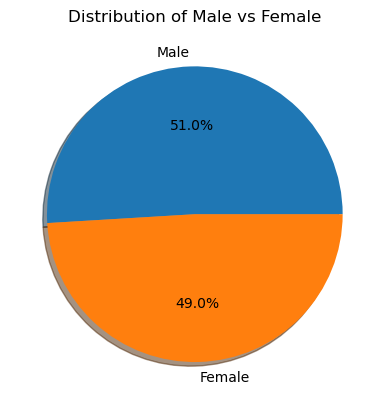

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get a list of the values to plot (Pandas can plot from a DataFrame, but pyplot wants a list of values)
gender_split_list = gender_split.values.tolist()

# Plot the pie chart using plt.<...> (pyplot)
plt.pie(gender_split_list,labels=labels, autopct="%1.1f%%", shadow=True)

# Add a title to this pie chart
plt.title('Distribution of Male vs Female')

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Before doing the above, I'm checking value counts so I get an idea of how much I'm excluding:
results_df1['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [147]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Filter the DataFrame (and assign a new name) to only rows where the four focus drugs were used
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments_df = results_df1[(results_df1['Drug Regimen']=='Capomulin') |
                              (results_df1['Drug Regimen']=='Ramicane') |
                              (results_df1['Drug Regimen']=='Infubinol') |
                              (results_df1['Drug Regimen']=='Ceftamin')
                                ]

# Checkiing value_counts again to ensure everything looks right
four_treatments_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Infubinol    178
Ceftamin     178
Name: Drug Regimen, dtype: int64

In [161]:
four_treatments_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [155]:
four_treatments_df.sort_values(by='Timepoint', ascending=False)


45

In [164]:
# Start by getting the last (greatest) timepoint for each mouse

# From the DataFrame that is already filtered to include only the 4 focus drugs, identify the max timepoint for each Mouse ID
last_timepoint = four_treatments_df.groupby('Mouse ID')['Timepoint'].idxmax()

# Create a new DataFrame using tehe indices of the rows with latest timepoint
last_timepoint_df = four_treatments_df.loc[last_timepoint]

# Filter the above DataFrame to only the rows with that max timepoint
last_timepoint_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1804,a203,Infubinol,Female,20,23,45,67.973419,2
1786,a251,Infubinol,Female,21,25,45,65.525743,1
1856,a275,Ceftamin,Female,20,28,45,62.999356,3
1773,a411,Ramicane,Male,3,22,45,38.407618,1
1836,a444,Ramicane,Female,10,25,45,43.047543,0


In [167]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# I used the "idxmax()" so this step is unnecessary I believe...
# last_tumor_volume_df = pd.merge(four_treatments_df,last_timepoint_df,on='Timepoint',how='left')
# last_tumor_volume_df['Drug Regimen']

In [169]:
treatment_type = last_timepoint_df['Drug Regimen'].unique().tolist()
treatment_type

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [170]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = last_timepoint_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
final_volume = []

for drug in drugs:
    tumor_volume1 = last_timepoint_df.loc[last_timepoint_df['Drug Regimen']==drug]['Tumor Volume (mm3)'].values
    final_volume.append(tumor_volume1)
    
final_volume

[array([67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309 ,
        36.3213458 , 60.96971133, 62.43540402, 60.91876652, 67.28962147,
        66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846,
        45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769,
        51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]),
 array([62.99935619, 45.        , 56.05774909, 55.74282869, 48.72207785,
        47.7846818 , 61.84902336, 68.92318457, 67.74866174, 57.91838132,
        46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223,
        64.19234114, 45.        , 52.92534846, 45.        , 67.52748237,
        45.        , 64.63494887, 61.38666032, 68.59474498, 64.72983655]),
 array([38.4076183 , 43.0475426 , 38.81036633, 32.97852192, 38.34200823,
        33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217,
        36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509,
        31.09533505, 45.22086888, 36.56165229, 

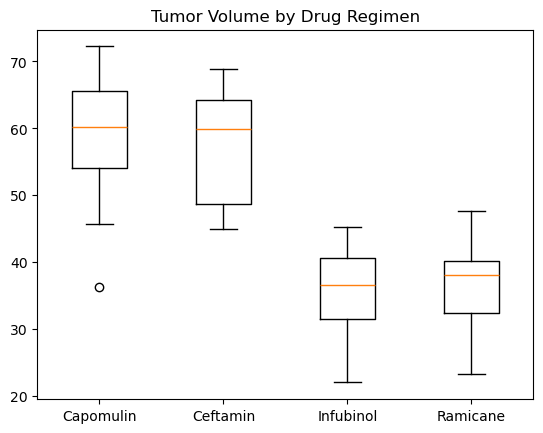

In [171]:
final_volume
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.boxplot(final_volume)
drugs.sort()
ax1.set_xticklabels(drugs)
plt.show()

In [ ]:
final_volume.sort()


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_type = last_tumor_volume_df['Drug Regimen'].unique.tolist()

# Create empty list to fill with tumor vol data (for plotting)
final_volume = []




# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [172]:
import pandas as pd

# Assuming 'four_treatments_df' is your DataFrame with 'Tumor Volume (mm3)' column and 'Drug Regimen' column

# Group the data by 'Drug Regimen'
grouped_data = four_treatments_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate the IQR for each drug regimen
for drug, group in grouped_data:
    quartiles = group.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Calculate lower and upper bounds for outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Subset of potential outliers for each drug regimen
    potential_outliers = group[(group < lower_bound) | (group > upper_bound)]
    
    # Display drug regimen, IQR, and potential outliers (if any)
    print(f"Drug Regimen: {drug}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {potential_outliers}\n")


Drug Regimen: Capomulin
IQR: 7.314067135000002
Potential Outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen: Ceftamin
IQR: 9.593010457500007
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Infubinol
IQR: 10.002090667500006
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Ramicane
IQR: 8.325365415
Potential Outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64



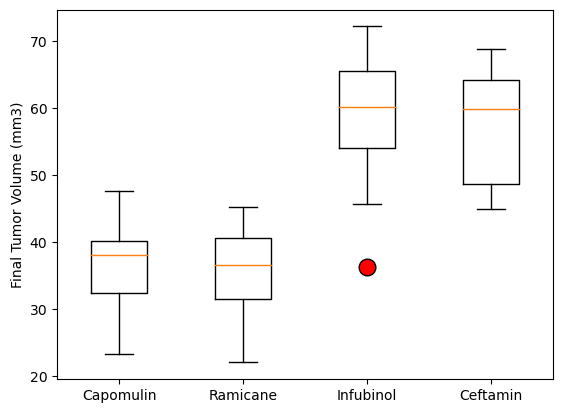

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [174]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# First grab all rows of data for the mouse with the ID shown and Capomulin treatments
Capo_mouse = results_df1[(results_df1['Mouse ID'] == "l509") & (results_df1['Drug Regimen'] == "Capomulin")]
Capo_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
231,l509,Capomulin,Male,17,21,0,45.000000,0
253,l509,Capomulin,Male,17,21,5,45.851193,0
539,l509,Capomulin,Male,17,21,10,46.759074,0
881,l509,Capomulin,Male,17,21,15,47.488599,1
982,l509,Capomulin,Male,17,21,20,48.070452,2


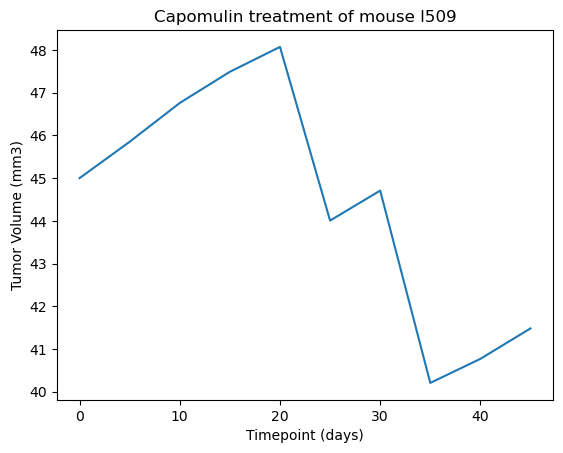

In [178]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin treatment of mouse l509')
ax1.plot(Capo_mouse['Timepoint'],Capo_mouse['Tumor Volume (mm3)'])
ax1.set_xlabel('Timepoint (days)')
ax1.set_ylabel('Tumor Volume (mm3)')

plt.show()

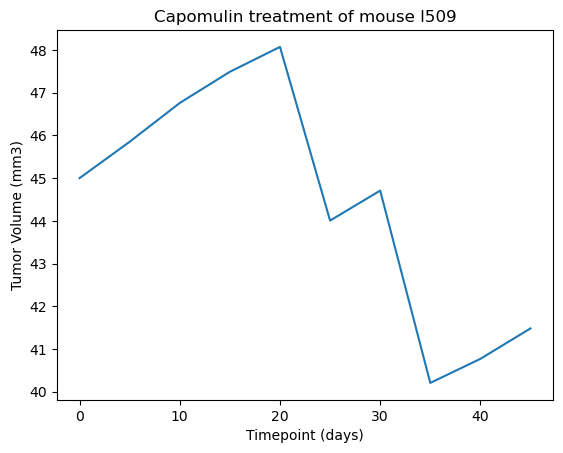

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


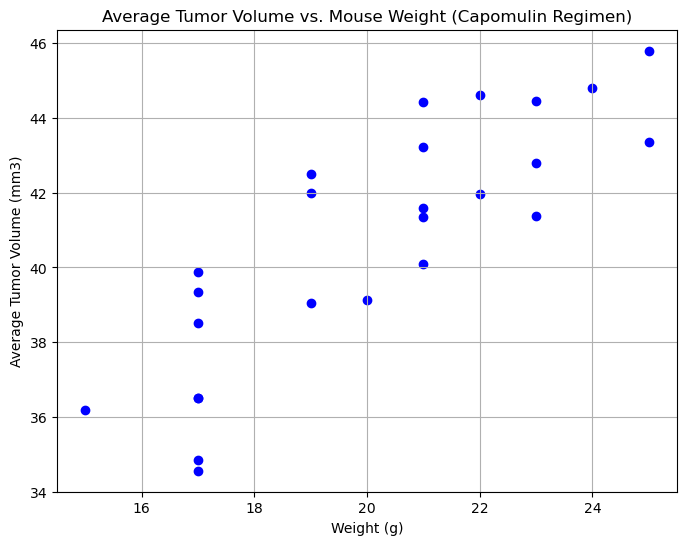

In [179]:
import matplotlib.pyplot as plt

# Assuming 'results_df1' is your DataFrame with necessary columns: 'Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)'

# Filter data for Capomulin regimen
capomulin_data = results_df1[results_df1['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and weight for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create scatter plot of mouse weight versus average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(average_weight, average_tumor_volume, marker='o', color='blue')

# Set plot title and labels
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid(True)
plt.show()


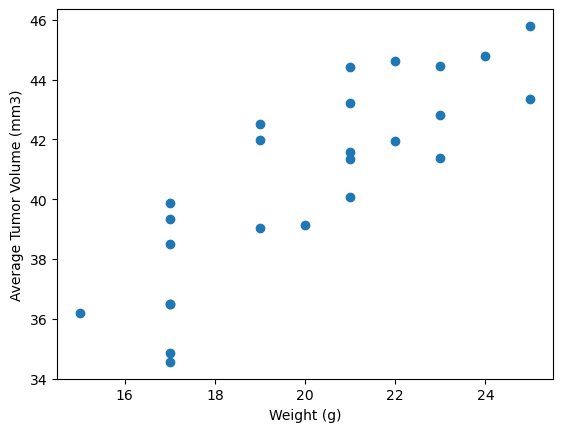

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


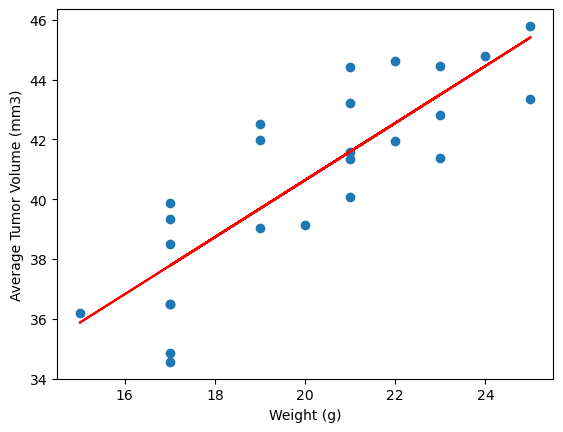

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
